# Supermarket Sales - Exploratory Data Analysis

## 0. Frame the problem

Get meaningful insights from the data in actionable manner

## 0.1. Data description

source: https://www.kaggle.com/aungpyaeap/supermarket-sales

The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Attribute information**

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5\% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## 0.2. EDA Guidelines

Branch and City have the same information meaning that we can drop one of them without losing information. Invoice ID is only a KEY and it's meaningful only for matching data sets and can also be dropped. Tax 5 \% is the same percentage of the Total for all items.

Date and time can be merged as datetime stamp. As only 3 month of data is available, the possible meaningful information here is variance within days of the week and time of the day.

Products have the same gross margin percentage meaning that any insights on cost can be analyzed in the data, so  the attribute as well as Gross income and COGS can be dropped.

## 0.3. Main Hypothesis

Rating relationships:
- Rating vs. Price
- Rating vs. Branch
- Rating vs. Customer type
- Rating vs. Product line
- Rating vs. Gender
- Rating vs. Payment method

Branch relationships:
- Branch vs. Price
- Branch vs. Product line
- Branch vs. Payment method

Total relationships:
- Total vs. Payment method
- Total vs. Gender
- Total vs. Product line
- Total vs. Customer Type
- Total vs. Day of the week

## 0.2. Imports

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Get the Data

In [60]:
data_raw = pd.read_csv('../inputs/data_raw/ssales.csv', parse_dates=[[10, 11]],
                       infer_datetime_format=True, index_col=0)

In [61]:
sales = data_raw.copy()

In [62]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
Date_Time,,,,,,,,,,,,,,,
2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [63]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2019-01-05 13:08:00 to 2019-02-18 13:28:00
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Payment                  1000 non-null   object 
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   f

## 2. Data Cleaning

In [64]:
sales.drop(['Invoice ID', 'Branch', 'Tax 5%', 'cogs', 
            'gross margin percentage', 'gross income'], axis=1, 
          inplace=True)

In [65]:
sales.describe()

,Unit price,Quantity,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,6.97270
std,26.494628,2.923431,245.885335,1.71858
min,10.080000,1.000000,10.678500,4.00000
25%,32.875000,3.000000,124.422375,5.50000
50%,55.230000,5.000000,253.848000,7.00000
75%,77.935000,8.000000,471.350250,8.50000
max,99.960000,10.000000,1042.650000,10.00000


## 3. EDA

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'Rating'}>]], dtype=object)

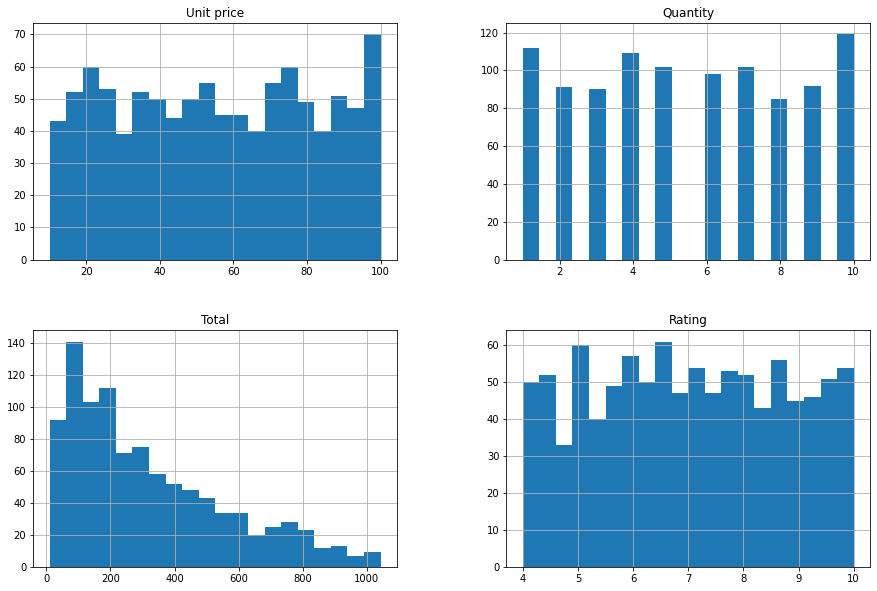

In [66]:
sales.hist(figsize=(15, 10), bins=20)

In [67]:
sales.corr()

,Unit price,Quantity,Total,Rating
Unit price,1.000000,0.010778,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,-0.015815
Total,0.633962,0.705510,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,1.000000


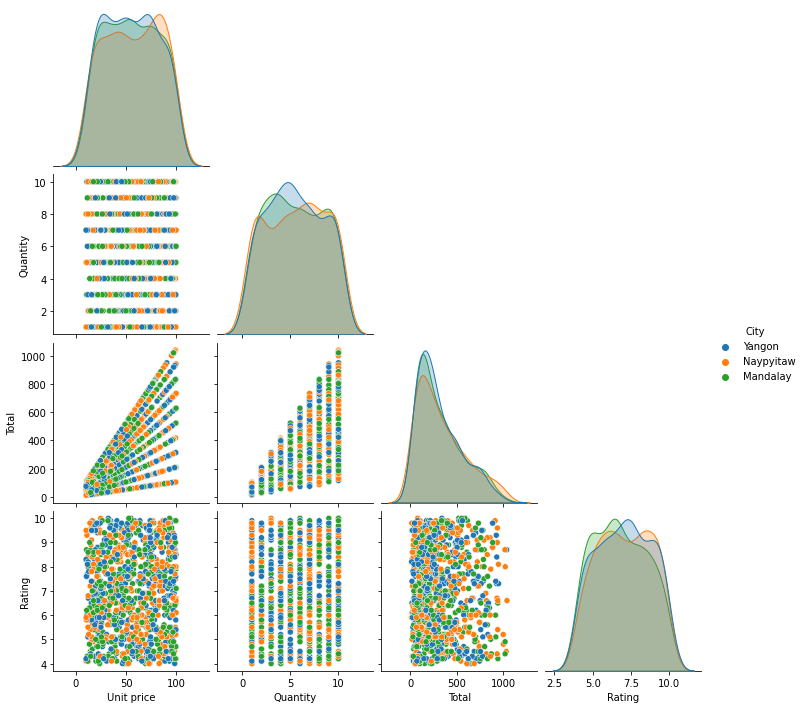

In [68]:
sns.pairplot(sales, hue='City', corner=True)

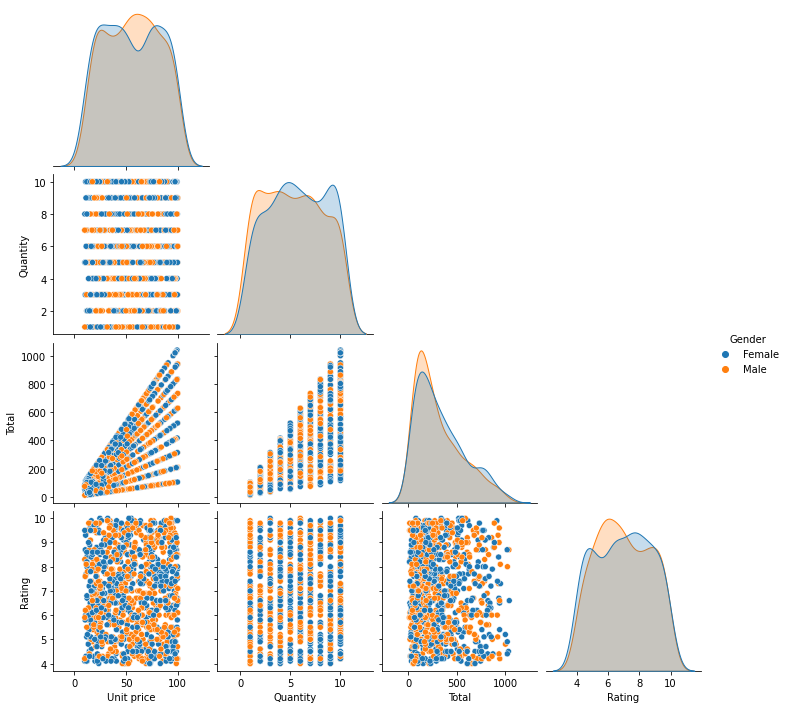

In [69]:
sns.pairplot(sales, hue='Gender', corner=True)

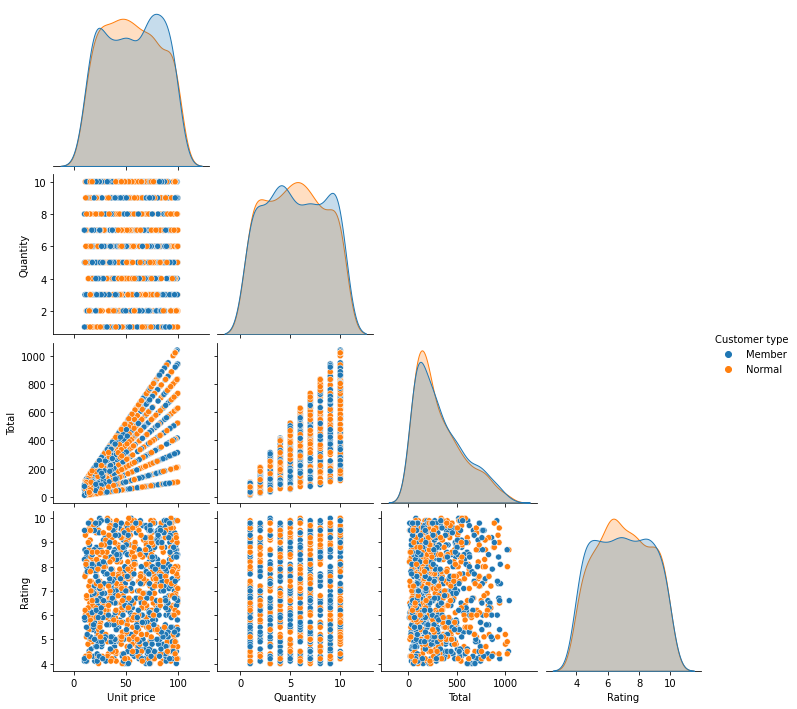

In [70]:
sns.pairplot(sales, hue='Customer type', corner=True)

There isn't strong correlation between numerical variables besides the direct related ones: Unit Price vs. Total and Total vs. Quantity

In [71]:
pd.crosstab(sales['Gender'], sales['Product line'], sales['Total'], aggfunc=np.mean)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,322.643125,317.056250,368.565750,290.015414,380.213639,324.712739
Male,316.691965,291.079207,273.499125,348.099460,294.136241,340.360327


In [72]:
pd.crosstab(sales['Gender'], sales['Product line'], normalize='index')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,0.167665,0.191617,0.179641,0.127745,0.157685,0.175649
Male,0.172345,0.164329,0.168337,0.176353,0.162325,0.156313


In [73]:
pd.crosstab(sales['Customer type'], sales['Product line'], sales['Total'], aggfunc=np.mean)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Customer type,,,,,,
Member,314.083269,306.092581,333.591702,353.849856,337.084663,324.532190
Normal,324.337353,304.151446,309.840300,295.730373,336.154364,340.361089


In [74]:
pd.crosstab(sales['Customer type'], sales['Product line'], normalize='index')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Customer type,,,,,,
Member,0.155689,0.171657,0.187625,0.145709,0.165669,0.173653
Normal,0.184369,0.184369,0.160321,0.158317,0.154309,0.158317


In [75]:
pd.crosstab(sales['Payment'], sales['Product line'], sales['Total'], aggfunc=np.mean)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Payment,,,,,,
Cash,291.971577,309.013895,337.032868,350.798143,364.490206,319.895136
Credit card,335.391685,309.554812,331.724434,319.389420,310.734900,336.155717
Ewallet,343.010038,297.800515,298.192500,302.550170,332.653781,341.347417


In [142]:
sales.groupby([sales.index.weekday]).agg([np.sum, np.mean, np.std])

Unit price                       Quantity                      \
                 sum       mean        std      sum      mean       std   
Date_Time                                                                 
0            7216.00  57.728000  26.499815      638  5.104000  2.790606   
1            8664.28  54.837215  25.678380      862  5.455696  2.961741   
2            7688.35  53.764685  28.449408      800  5.594406  3.030915   
3            7860.35  56.959058  26.001950      755  5.471014  2.890185   
4            7658.52  55.097266  27.501344      758  5.453237  2.964092   
5            9333.74  56.913049  27.033870      919  5.603659  2.929894   
6            7250.89  54.517970  24.268984      778  5.849624  2.880173   

                Total                          Rating                      
                  sum        mean         std     sum      mean       std  
Date_Time                                                                  
0          37899.0780  303.192624  219.772549   894.2  7.153600  1.731145  
1          51482.2455  325.836997  259.332220  1106.5  7.003165  1.715773  
2          43731.1350  305.812133  244.734992   973.2  6.805594  1.625795  
3          45349.2480  328.617739  243.786244   950.8  6.889855  1.676296  
4          43926.3405  316.016838  259.006587   983.6  7.076259  1.719689  
5          56120.8095  342.200058  253.336213  1131.9  6.901829  1.724471  
6          44457.8925  334.269868  235.230642   932.5  7.011278  1.850334

<AxesSubplot:xlabel='Date_Time'>

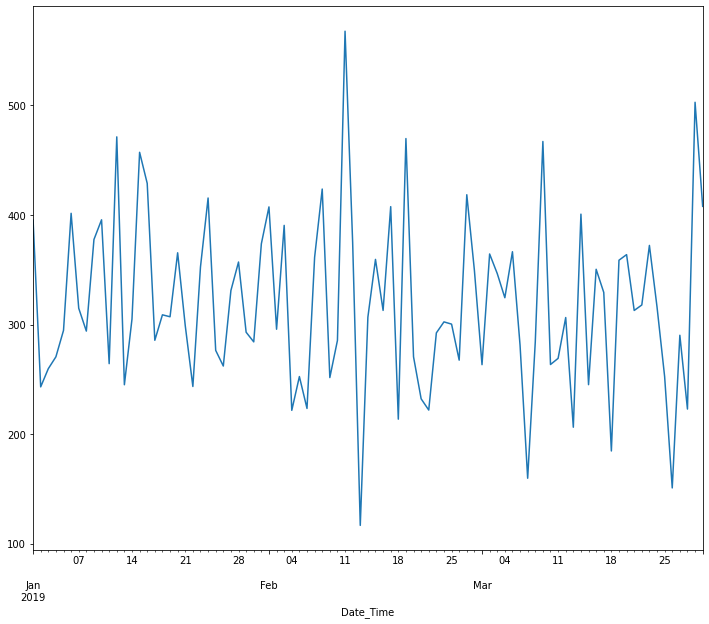

In [139]:
sales.resample('D')['Total'].mean().plot(figsize=(12, 10))

<AxesSubplot:xlabel='Date_Time'>

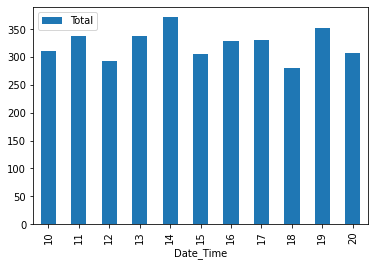

In [95]:
sales.groupby([sales.index.hour]).mean().plot(y='Total', kind='bar')

In [143]:
sales.groupby([sales.index.hour]).agg([np.sum, np.mean, np.std])

Unit price                       Quantity                      \
                 sum       mean        std      sum      mean       std   
Date_Time                                                                 
10           5820.38  57.627525  27.072949      525  5.198020  2.887974   
11           5112.64  56.807111  28.481438      513  5.700000  3.124567   
12           4475.95  50.291573  26.758626      501  5.629213  3.039071   
13           5599.27  54.361845  24.988633      585  5.679612  2.694270   
14           4765.65  57.417470  27.221477      495  5.963855  3.030116   
15           5481.48  53.740000  24.770272      530  5.196078  3.034584   
16           4646.75  60.347403  25.826175      420  5.454545  2.980398   
17           4204.53  56.817973  26.176349      415  5.608108  2.894575   
18           4823.38  51.864301  28.575389      475  5.107527  2.708531   
19           6607.21  58.470885  25.502857      649  5.743363  2.896361   
20           4134.89  55.131867  25.924690      402  5.360000  2.916125   

                Total                         Rating                      
                  sum        mean         std    sum      mean       std  
Date_Time                                                                 
10         31421.4810  311.103772  244.392253  716.9  7.098020  1.648453  
11         30377.3295  337.525883  259.957900  612.6  6.806667  1.779900  
12         26065.8825  292.875084  232.757307  649.7  7.300000  1.623758  
13         34723.2270  337.118709  260.056127  724.1  7.030097  1.663968  
14         30828.3990  371.426494  270.861916  575.6  6.934940  1.687431  
15         31179.5085  305.681456  244.391283  701.4  6.876471  1.705331  
16         25226.3235  327.614591  226.309199  528.2  6.859740  1.827801  
17         24445.2180  330.340784  246.224099  513.5  6.939189  1.765407  
18         26030.3400  279.896129  223.847145  668.4  7.187097  1.677940  
19         39699.5130  351.323124  242.415655  759.0  6.716814  1.766499  
20         22969.5270  306.260360  247.641933  523.3  6.977333  1.791615

## 4. Feature Engineering

## 5. Significance test for promising hypothesis